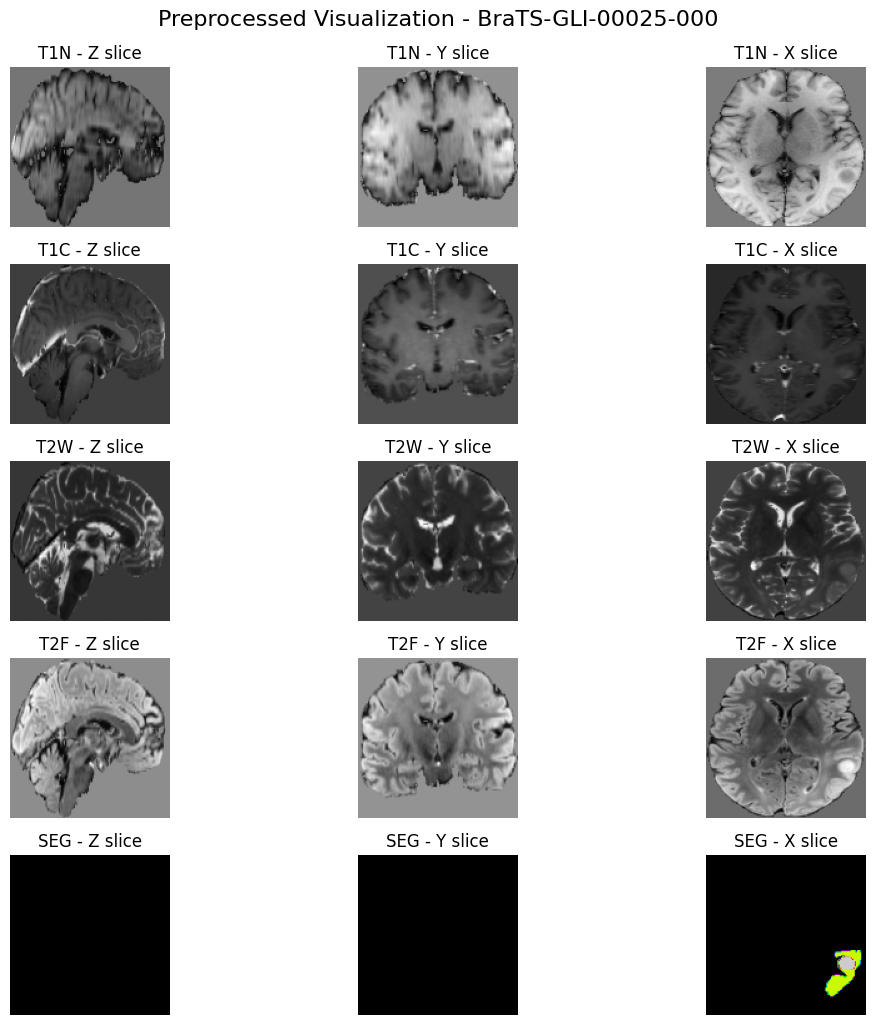

In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Choose a patient ID
base_path = r"F:\Projects\ML_Models\BrainTome\data\processed"
patient_id = "BraTS-GLI-00025-000"  # ← Replace with any ID you like
patient_folder = os.path.join(base_path, patient_id)

modalities = ["t1n", "t1c", "t2w", "t2f"]
volumes = {}
for mod in modalities + ["seg"]:
    file = os.path.join(patient_folder, f"{patient_id}-{mod}_resized.nii.gz")
    volumes[mod] = nib.load(file).get_fdata()

# Mid-slice index for each axis
mid_slices = {
    "z": volumes["t1n"].shape[0] // 2,
    "y": volumes["t1n"].shape[1] // 2,
    "x": volumes["t1n"].shape[2] // 2,
}

# Plot slices from each axis
fig, axs = plt.subplots(len(modalities)+1, 3, figsize=(12, 10))
axes = ['z', 'y', 'x']

for i, mod in enumerate(modalities + ["seg"]):
    for j, axis in enumerate(axes):
        idx = mid_slices[axis]
        if axis == 'z':
            img = volumes[mod][idx, :, :]
        elif axis == 'y':
            img = volumes[mod][:, idx, :]
        elif axis == 'x':
            img = volumes[mod][:, :, idx]

        axs[i, j].imshow(img.T, cmap='gray' if mod != "seg" else 'nipy_spectral', origin='lower')
        axs[i, j].axis("off")
        axs[i, j].set_title(f"{mod.upper()} - {axis.upper()} slice")

plt.tight_layout()
plt.suptitle(f"Preprocessed Visualization - {patient_id}", y=1.02, fontsize=16)
plt.show()
